In [85]:
%matplotlib inline
from __future__ import print_function

from matplotlib import pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns

import numpy as np
import pandas as pd

%load_ext autoreload
%autoreload 2
 
import importlib
import pickle
from utils.result_utils import *
root = '/Users/thorey/Documents/project/competition/fognet/models/clavius/lstm'

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [84]:
os.getcwd()

'/Users/thorey/Documents/project/competition/fognet'

In [44]:
from utils.data_utils import *

In [231]:
def get_three_period(df):
    ''' Get a dataframe, and return the same DF with an extra
    columns group which reference different group (3 groups).
    '''
    df['group'] = 'null'
    df.loc[:'2014-11', 'group'] = 'group0'
    df.loc['2014-12':'2015-04-01', 'group'] = 'group1'
    df.loc['2015-08':, 'group'] = 'group2'
    assert 'null' not in set(df.group)
    
    gp_tmp = []
    # Construct an index where the space between two obs is only 2H
    for name, gp in df.groupby('group'):
        print(gp.index.min(),gp.index.max())
        dindex = pd.DataFrame(index=pd.date_range(start=gp.index.min(), end=gp.index.max(), freq='2H'))
        newgp = dindex.join(gp,how='left')
        gp_tmp.append(newgp)
    
    #return gp_tmp
    return gp_tmp

In [232]:
data = load_raw_data()
train = data['microclimat_train']
train['set'] = 'train'
test = data['microclimat_test']
sub = data['submission_format']
sub['set'] = 'pred'
df = train.append(sub.join(test,how='left'))

In [233]:
gp0,gp1,gp2 = get_three_period(df)

AssertionError: 

2013-11-23 16:00:00 2014-11-02 10:00:00
2014-12-01 00:00:00 2015-04-30 16:00:00
2015-08-03 14:00:00 2016-01-04 10:00:00


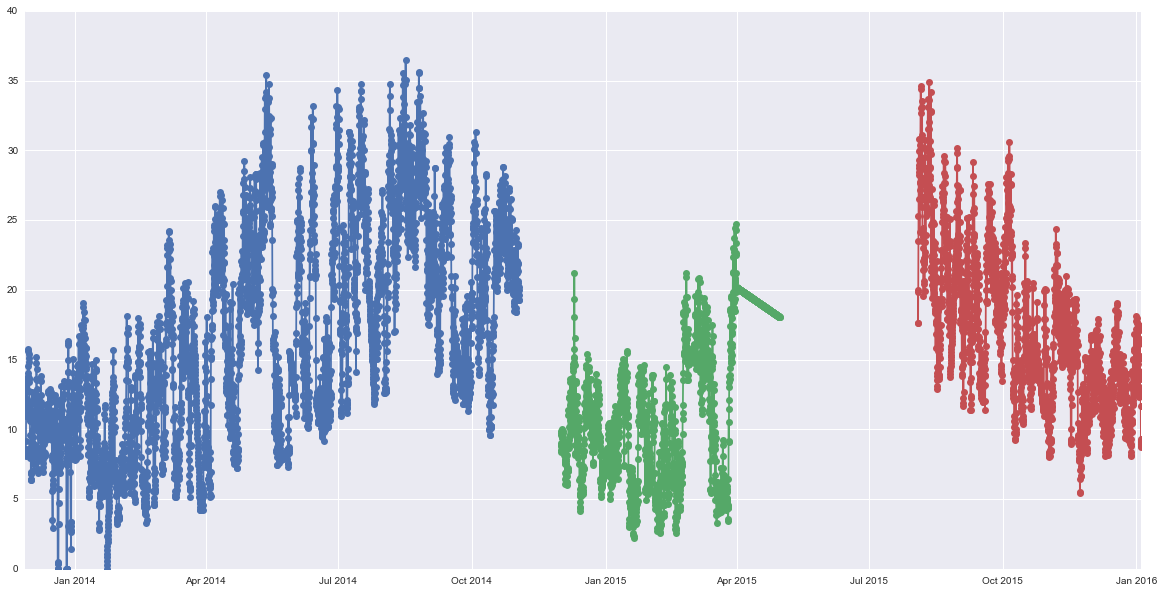

In [227]:
fig = plt.figure(figsize = (20,10))
print(gp0.index.min(),gp0.index.max())
plt.plot(gp0.temp.interpolate(),marker ='o')
print(gp1.index.min(),gp1.index.max())
plt.plot(gp1.temp.interpolate(),marker ='o')
print(gp2.index.min(),gp2.index.max())
plt.plot(gp2.temp.interpolate(),marker ='o')

In [218]:
gp = gp0.append(gp1).append(gp2)

In [219]:
set(gp1.group)

{nan, 'group1'}

In [174]:
dfg = df.groupby('group')
gp = dfg.get_group('group0')


In [ ]:
d = pd.DataFrame(index=pd.date_range(
            start=gp.index.min(), end=gp.index.max(), freq='2H'))

In [170]:
newgp = d.join(gp,how='left')

In [158]:
gp = dfg.get_group('group0')
d = pd.DataFrame(index=pd.date_range(
            start=gp.index.min(), end=gp.index.max(), freq='2H'))
#add_group_column_to_data(d)

In [133]:
data = load_raw_data()
train = data['microclimat_train']
train['set'] = 'train'
test = data['microclimat_test']
sub = data['submission_format']
sub['set'] = 'pred'
df = train.append(sub.join(test,how='left'))
#df = pd.DataFrame(index=pd.date_range(start=df.index.min(),end=df.index.max(),freq='2H')).join(df,how='left')
#df.interpolate(method='time')

In [134]:
df = get_three_period(df)

2013-11-23 16:00:00 2014-11-02 10:00:00
2014-12-01 00:00:00 2015-04-30 16:00:00
2015-08-03 14:00:00 2016-01-04 10:00:00


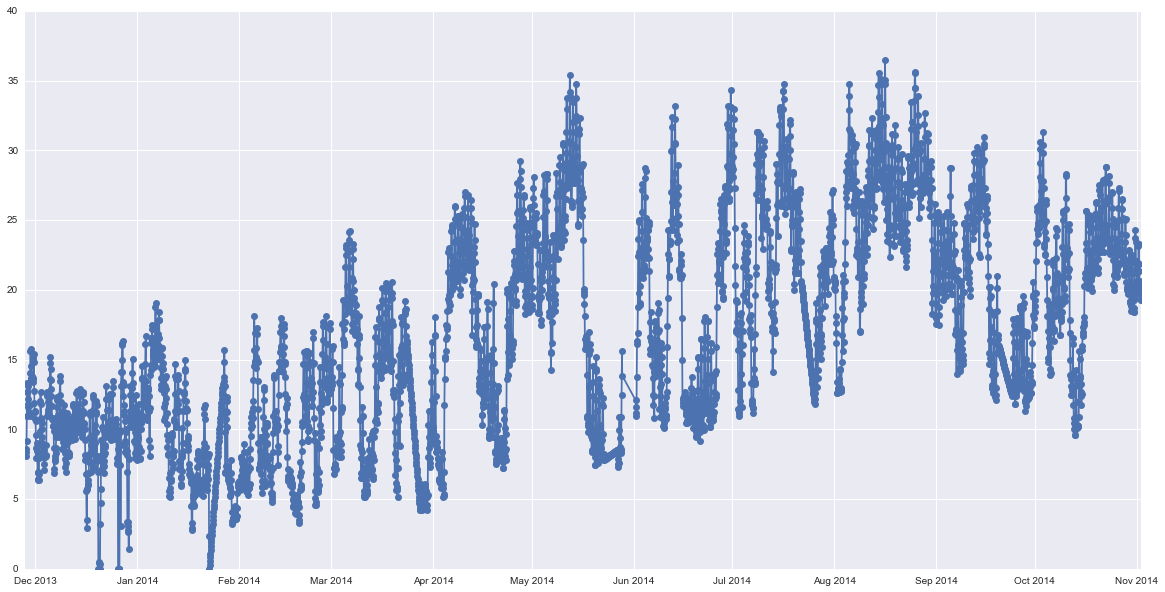

In [145]:
fig = plt.figure(figsize = (20,10))
plt.plot(dfg.get_group('group0').temp.interpolate(),marker ='o')

In [143]:
set(add_group_column_to_data(dfg.get_group('group0')).group)

{'group0', 'group1'}

In [144]:
add_group_column_to_data(dfg.get_group('group0'))

,gusts_ms,humidity,leafwet450_min,leafwet460_min,leafwet_lwscnt,percip_mm,set,temp,wind_dir,wind_ms,yield,group
2013-11-23 16:00:00,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN,NaN,NaN,NaN,group0
2013-11-23 18:00:00,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN,NaN,NaN,NaN,group0
2013-11-23 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN,NaN,NaN,NaN,group0
2013-11-23 22:00:00,NaN,NaN,NaN,NaN,NaN,NaN,train,NaN,NaN,NaN,NaN,group0
2013-11-24 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0
2013-11-24 02:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0
2013-11-24 04:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0
2013-11-24 06:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0
2013-11-24 08:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0
2013-11-24 10:00:00,NaN,NaN,NaN,NaN,NaN,NaN,pred,NaN,NaN,NaN,0,group0


In [45]:
data = load_raw_data()
train = data['microclimat_train']
train['set'] = 'train'
test = data['microclimat_test']
sub = data['submission_format']
sub['set'] = 'pred'
df = train.append(sub.join(test,how='left'))
df_tmp = pd.DataFrame(index=pd.date_range(start=df.index.min(),end=df.index.max(),freq='2H')).join(df,how='left')

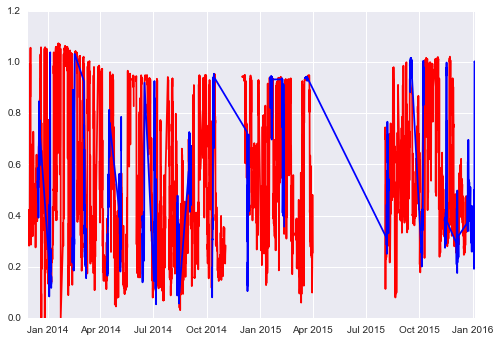

In [20]:
#plt.plot(df_tmp[df_tmp['set'] == 'train']['yield'])
plt.plot(df_tmp[df_tmp['set'] == 'train']['humidity'],color ='r')
plt.plot(df_tmp[df_tmp['set'] == 'pred']['humidity'],color ='b')

In [18]:
set(add_group_column_to_data(df_tmp).group)

{'group0'}

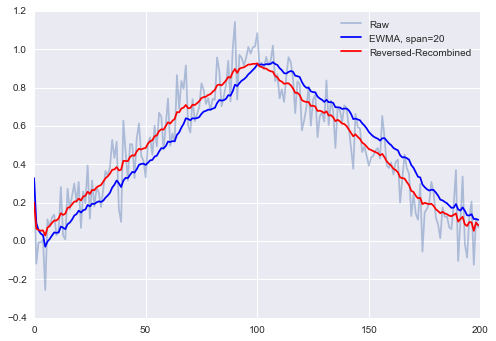

In [7]:
import pandas, numpy as np
ewma = pandas.stats.moments.ewma

# make a hat function, and add noise
x = np.linspace(0,1,100)
x = np.hstack((x,x[::-1]))
x += np.random.normal( loc=0, scale=0.1, size=200 )
plt.plot( x, alpha=0.4, label='Raw' )

# take EWMA in both directions with a smaller span term
fwd = ewma( x, span=15 )          # take EWMA in fwd direction
bwd = ewma( x[::-1], span=15 )    # take EWMA in bwd direction
c = np.vstack(( fwd, bwd[::-1] )) # lump fwd and bwd together
c = np.mean( c, axis=0 )          # average  

# regular EWMA, with bias against trend
plt.plot( ewma( x, span=20 ), 'b', label='EWMA, span=20' )

# "corrected" (?) EWMA
plt.plot( c, 'r', label='Reversed-Recombined' )
plt.legend()

In [12]:
fwd = ewma?

In [ ]:
fwd = ewma

In [ ]:
plt.scatter(df_tmp.index,df_tmp.interpolate(method='cubic').humidity)

In [188]:
df.interpolate?

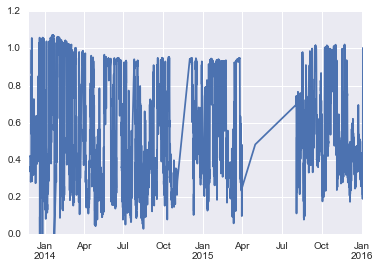

In [181]:
df_tmp.interpolate(method='time').humidity.plot()

In [ ]:
def lstm(n=2, D=2, H=100, grad_clip=10):
    '''
    Build a simple lstm architecture.
    n = nombre lstm layers
    input : (N,T,D) input tensor
    output : (N,T,1) output predictions

    with N the number of seq in a batch, T the size of a seq and
    D the number of feature for an input vector

    parameters:
    D : Number of feature for the input layer
    H : Number of hidden units
    GRAD_CLIP : Threeshold value to clip the gradients

    '''
    # input layer (list for variable seq/batch size)
    l_in = lasagne.layers.InputLayer(name='in',
                                     shape=(None, None, D))
    batchsize, seqlen, _ = l_in.input_var.shape
    # lstm layer with tanh non linearity and grad clipper
    l_layer_before = l_in
    for i in range(n):
        l_lstm = lasagne.layers.LSTMLayer(l_layer_before,
                                          H,
                                          name='lstm_%d' % (i),
                                          grad_clipping=grad_clip,
                                          nonlinearity=lasagne.nonlinearities.tanh)
        l_layer_before = l_lstm

    # reshaping prior to feed to the scoringlayer
    l_shp = lasagne.layers.ReshapeLayer(l_lstm, (-1, H))
    # Dense scoring layers
    l_dense = lasagne.layers.DenseLayer(l_shp,
                                        num_units=1,
                                        name='dense',
                                        nonlinearity=lasagne.nonlinearities.rectify)
    # return (N,T) sequence of predictions.
    l_out = lasagne.layers.ReshapeLayer(l_dense, (batchsize, seqlen))

    return l_out


In [21]:
import lasagne

/Users/thorey/miniconda2/envs/fognet/lib/python2.7/site-packages/theano/tensor/signal/downsample.py:6: UserWarning: downsample module has been moved to the theano.tensor.signal.pool module.
  "downsample module has been moved to the theano.tensor.signal.pool module.")


In [39]:
n_batches = 4
T_max = 10
l_in = lasagne.layers.InputLayer(name='in',shape=(n_batches, T_max, 2))
l_mask = lasagne.layers.InputLayer(shape=(n_batches, T_max))
l_lstm = lasagne.layers.LSTMLayer(l_in,
                                  2,
                                  
                                  mask_input = l_mask,
                                  name='lstm',
                                  nonlinearity=lasagne.nonlinearities.tanh)
l_shp = lasagne.layers.ReshapeLayer(l_lstm, (-1, H))
# Dense scoring layers
l_dense = lasagne.layers.DenseLayer(l_shp,
                                    num_units=1,
                                    name='dense',
                                    nonlinearity=lasagne.nonlinearities.rectify)
# rturn (N,T) sequence of predictions.
l_out = lasagne.layers.ReshapeLayer(l_dense, (batchsize, seqlen))

NameError: name 'H' is not defined

In [36]:
x = np.arange(1,2000,1)
y = x**2

In [38]:
y

array([      1,       4,       9, ..., 3988009, 3992004, 3996001])